# 1. How to Win a Data Science Competition: Learn from Top Kagglers

There are a number of ways to validate second level models (meta-models). In this reading material you will find a description for the most popular ones. If not specified, we assume that the data does not have a time component. We also assume we already validated and fixed hyperparameters for the first level models (models).

두 번째 수준 모델 (메타 모델)의 유효성을 검사하는 데는 여러 가지 방법이 있습니다. 

언급되지 않으면 데이터에 시간 구성 요소가 없다고 가정합니다. 

또한 첫 번째 레벨 모델에 대한 하이퍼 매개 변수를 이미 검증하고 고정했다고 가정합니다.

a) Simple holdout scheme

1. Split train data into three parts: partA and partB and partC.
2. Fit N diverse models on partA, predict for partB, partC, test_data getting meta-features partB_meta, partC_meta and test_meta respectively.
3. Fit a metamodel to a partB_meta while validating its hyperparameters on partC_meta.
4. When the metamodel is validated, fit it to [partB_meta, partC_meta] and predict for test_meta.

a) 간단한 holdout 방법

1. 학습데이터를 partA와 partB 및 partC의 세 부분으로 나눕니다.
2. partA에서 N 개의 다양한 모델을 Fit시키고 partB, partC, test_data를 예측하여 meta-feature인 partB_meta, partC_meta 및 test_meta를 얻습니다.
3. partB_meta로 메타 모델을 학습하고, partC_meta로 하이퍼 매개 변수를 검증합니다.
4. 메타 모델의 유효성이 확인되면 [partB_meta, partC_meta]에 학습하고 test_meta를 예측합니다.

b) Meta holdout scheme with OOF meta-features

1. Split train data into K folds. Iterate though each fold: retrain N diverse models on all folds except current fold, predict for the current fold. After this step for each object in train_data we will have N meta-features (also known as out-of-fold predictions, OOF). Let's call them train_meta.
2. Fit models to whole train data and predict for test data. Let's call these features test_meta.
3. Split train_meta into two parts: train_metaA and train_metaB. Fit a meta-model to train_metaA while validating its hyperparameters on train_metaB.
4. When the meta-model is validated, fit it to train_meta and predict for test_meta.

b) OOF meta-feautre을 사용한 메타 holdout 방법

1. K fold로 학습 데이터를 나눕니다. 각 fold에서 다음을 반복합니다: 현재 폴드를 제외한 모든 폴드에서 N 개의 다양한 모델을 재 훈련하고 현재 폴드를 예측합니다. train_data의 각 객체에 대해 이 단계를 수행 한 후에는 N 개의 메타 feature (out-of-fold 예측, OOF라고도 함)을 갖게됩니다. 이것을 train_meta라고 부르자.
2. 모델을 전체 학습 데이터를 학습시키고 테스트 데이터를 예측합니다. 이 feature들을 test_meta라고 부르자.
3. train_meta를 train_metaA와 train_metaB의 두 부분으로 나눕니다. train_metaA로 메타 모델을 학습시키고 train_metaB에서 hyperparameters를 검증합니다.
4. meta-model을 검증할때, train_meta로 학습하고 test_meta를 예측합니다.

c) Meta KFold scheme with OOF meta-features

1. Obtain OOF predictions train_meta and test metafeatures test_meta using b.1 and b.2.
2. Use KFold scheme on train_meta to validate hyperparameters for meta-model. A common practice to fix seed for this KFold to be the same as seed for KFold used to get OOF predictions.
3. When the meta-model is validated, fit it to train_meta and predict for test_meta.


c) OOF meta-feature을 사용한 Meta KFold 방법

1. b.1과 b.2를 사용하여 train_meta와 test_meta를 얻습니다.
2. train_meta에 대해 KFold 방법을 사용하여 meta-model에 대한 hyperparameters를 검증합니다. seed를 고정하여 검증.
3. 메타 모델에 대한 검증이 완료되면, train_meta를 학습하여 test_meta를 예측합니다.

d) Holdout scheme with OOF meta-features

1. Split train data into two parts: partA and partB.
2. Split partA into K folds. Iterate though each fold: retrain N diverse models on all folds except current fold, predict for the current fold. After this step for each object in partA we will have N meta-features (also known as out-of-fold predictions, OOF). Let's call them partA_meta.
3. Fit models to whole partA and predict for partB and test_data, getting partB_meta and test_meta respectively.
4. Fit a meta-model to a partA_meta, using partB_meta to validate its hyperparameters.
5. When the meta-model is validated basically do 2. and 3. without dividing train_data into parts and then train a meta-model. That is, first get out-of-fold predictions train_meta for the train_data using models. Then train models on train_data, predict for test_data, getting test_meta. Train meta-model on the train_meta and predict for test_meta.

d) OOF meta-feature을 사용한 holdout 방법

1. 학습 데이터를 partA와 partB 두 부분으로 나눕니다.
2. partA를 K fold로 나눕니다. 각 fold에 대해 다음을 반복합니다: 현재 fold를 제외한 모든 fold에서 N 개의 다양한 모델을 재 학습하고 현재 fold를 예측합니다. partA에 있는 각 객체에 대해이 단계를 수행 한 후에는 N 개의 meta-feature (out-of-fold, OOF라고도 함)을 갖게됩니다. 이것을 partA_meta라고 부르자.
3. model을 전체 partA로 학습시키고 partB 및 test_data를 예측하여 partB_meta 및 test_meta를 각각 얻습니다.
4. partA_meta로 meta-model을 학습시키고 partB_meta를 사용하여 해당 hyperparameter를 검증합니다.
5.  meta-model이 검증되면 기본적으로 train_data를 파트로 나누지 않고 2.와 3.를 수행 한 후 메타 모델을 학습시킵니다. 즉, 먼저 모델들을 사용하여 train_data에 대해 out-of-fold predictions train_meta를 얻습니다. 그런 다음 train_data로 모델을 훈련시키고, test_data를 예측하여 test_meta를 얻습니다. train_meta로 meta-model을 훈련시키고 test_meta를 예측하십시오.

e) KFold scheme with OOF meta-features

1. To validate the model we basically do d.1 -- d.4 but we divide train data into parts partA and partB M times using KFold strategy with M folds.
2. When the meta-model is validated do d.5.

e) OOF meta-feature을 사용한 KFold 방법

1. 모델을 검증하기 위해 기본적으로 d.1 - d.4를 수행하지만 학습 데이터를 partA와 partB로 나누고 K 폴드 전략을 M 폴드로 사용합니다.
2. meta-model 검증이 완료되면 d.5를 수행합니다.

f) Validation in presence of time component

In time-series task we usually have a fixed period of time we are asked to predict. Like day, week, month or arbitrary period with duration of T.

1. Split the train data into chunks of duration T. Select first M chunks.
2. Fit N diverse models on those M chunks and predict for the chunk M+1. Then fit those models on first M+1 chunks and predict for chunk M+2 and so on, until you hit the end. After that use all train data to fit models and get predictions for test. Now we will have meta-features for the chunks starting from number M+1 as well as meta-features for the test.
3. Now we can use meta-features from first K chunks [M+1,M+2,..,M+K] to fit level 2 models and validate them on chunk M+K+1. Essentially we are back to step 1. with the lesser amount of chunks and meta-features instead of features.

시간 구성요소가 있을때, 검증방법

시계열 작업에서 우리는 대개 일정 기간을 예측하게 됩니다. (일, 주, 월 또는 T의 기간)

1. 학습 데이터를 T 기간의 청크로 분할합니다. 첫 번째 M 청크를 선택합니다.
2. M번째 청크에 대해 N 개의 다양한 모델을 학습시키고 청크 M + 1을 예측합니다. 그런 다음 해당 모델을 첫 번째 M + 1 청크로 학습시키고 청크 M + 2를 예측합니다. 이를 마지막까지 반복 합니다. 그 후 모든 데이터로 모델을 학습시키고 테스트에 대한 예측결과를 얻습니다. 이제 M + 1 번 부터 시작하여 청크에 대한 meta feature와 테스트를 위한 meta-freature를 가지게 될 것입니다.
3. 이제 첫 번째 K 청크 [M + 1, M + 2, .., M + K]의 meta-feature들을 사용하여 레벨 2 모델을 학습시키고 M + K + 1 청크로 검증합니다. 1 단계로 돌아갑니다. feature들 대신에 청크와 meta-feature의 적은 양으로.

g) KFold scheme in time series with limited amount of data

We may often encounter a situation, where scheme f) is not applicable, especially with limited amount of data. For example, when we have only years 2014, 2015, 2016 in train and we need to predict for a whole year 2017 in test. In such cases scheme c) could be of help, but with one constraint: KFold split should be done with the respect to the time component. For example, in case of data with several years we would treat each year as a fold.

g) 제한된 양의 데이터를 갖는 시계열에서의 KFold 방법

방법 f)가 적용될 수없는 상황, 특히 제한된 양의 데이터가있는 경우가 종종 있습니다. 예를 들어, 우리는 2014 년, 2015 년, 2016 년의 학습데이터가 있고 2017 년을 예측할 필요가 있습니다. 그러한 경우에 방법 c)는 도움이 될 수 있지만 한 가지 제약이 있습니다. KFold 분할은 시간 구성 요소와 관련하여 수행되어야합니다. 예를 들어, 몇 년 동안의 데이터의 경우 매년을 하나의 fold로서 취급 할 것입니다.

## Code: stacking example

1. 100개의 train데이터와 99개의 테스트 데이터 (2개의 feature로 나이 예측)
2. 100개의 train데이터를 2그룹으로 나눔 (training/valid)
3. 2개의 모델에 training데이터를 학습시킴
4. 학습시킨 모델로 valid데이터를 예측하여 예측결과 데이터 생성
5. 학습시킨 모델로 test데이터를 예측함하여 예측결과 데이터 생성
6. vaild 예측결과 데이터를 stack하여 메타모델의 학습데이터로 사용
7. test 예측결과 데이터를 stack하여 학습된 메타모델로 예측하여 최종 예측

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 23 23:16:44 2017
@author: Marios Michailidis
This is an example that performs stacking to improve mean squared error
This examples uses 2 bases learners (a linear regression and a random forest)
and  linear regression (again) as a meta learner to achieve the best score.
The initial train data are split in 2 halves to commence the stacking. 
"""

'\nCreated on Mon Sep 23 23:16:44 2017\n@author: Marios Michailidis\nThis is an example that performs stacking to improve mean squared error\nThis examples uses 2 bases learners (a linear regression and a random forest)\nand  linear regression (again) as a meta learner to achieve the best score.\nThe initial train data are split in 2 halves to commence the stacking. \n'

In [0]:
# train is the training data
train=[
       [0.624,0.583],[0.321,0.016],[0.095,0.285],[0.235,0.573],[0.027,0.146],[0.514,0.06],[0.612,0.083],[0.054,0.597],
       [0.344,0.108],[0.671,0.089],[0.486,0.583],[0.829,0.929],[0.451,0.018],[0.448,0.286],[0.26,0.914],[0.893,0.706],
       [0.951,0.487],[0.811,0.075],[0.65,0.505],[0.902,0.24],[0.312,0.617],[0.907,0.844],[0.629,0.194],[0.333,0.559],
       [0.98,0.983],[0.87,0.706],[0.611,0.623],[0.463,0.097],[0.957,0.507],[0.341,0.792],[0.384,0.482],[0.584,0.655],
       [0.446,0.454],[0.314,0.396],[0.061,0.712],[0.951,0.691],[0.71,0.444],[0.238,0.809],[0.943,0.874],[0.325,0.619],
       [0.438,0.146],[0.131,0.055],[0.884,0.083],[0.306,0.641],[0.071,0.32],[0.765,0.402],[0.321,0.584],[0.714,0.444],
       [0.533,0.811],[0.644,0.293],[0.403,0.579],[0.278,0.577],[0.888,0.902],[0.99,0.182],[0.212,0.072],[0.692,0.386],
       [0.919,0.318],[0.082,0.234],[0.99,0.597],[0.867,0.371],[0.158,0.154],[0.304,0.826],[0.088,0.638],[0.382,0.87],
       [0.491,0.75],[0.155,0.731],[0.291,0.494],[0.76,0.304],[0.602,0.904],[0.512,0.713],[0.28,0.626],[0.99,0.566],
       [0.26,0.613],[0.312,0.561],[0.84,0.695],[0.112,0.245],[0.701,0.479],[0.974,0.103],[0.507,0.188],[0.583,0.586],
       [0.965,0.96],[0.112,0.007],[0.018,0.752],[0.063,0.967],[0.456,0.024],[0.214,0.107],[0.086,0.352],[0.892,0.356],
       [0.533,0.533],[0.276,0.241],[0.514,0.363],[0.241,0.765],[0.829,0.821],[0.73,0.54],[0.136,0.635],[0.431,0.248],
       [0.288,0.259],[0.008,0.663],[0.856,0.954],[0.579,0.972]
       ]
# y is the target variable for the train data
y=[19.444,4.992,2.11,13.708,0.805,8.619,10.21,11.443,5.624,11.092,17.783,19.544,7.135,7.411,10.633,19.133,23.157,
   12.794,18.729,14.939,9.564,19.852,10.028,14.571,22.387,18.742,14.089,8.017,23.241,11.613,14.473,13.893,15.127,
   12.062,5.968,19.842,18.636,9.556,21.748,9.319,7.09,2.423,14.594,9.14,6.539,18.883,15.257,18.729,14.114,10.36,
   16.359,14.56,19.991,15.411,3.763,17.696,19.243,1.937,26.017,19.858,2.971,10.657,5.808,11.943,13.442,7.663,
   13.304,17.375,15.677,13.589,8.728,25.399,8.824,14.796,18.179,2.405,19.424,15.835,8.254,19.661,21.516,1.764,
   5.845,8.68,7.262,3.478,7.544,19.942,17.491,4.847,14.444,9.097,18.873,20.894,7.049,7.103,5.038,5.026,20.896,16.037]

# test is the test data
test=[
      [0.463,0.496],[0.45,0.365],[0.131,0.283],[0.015,0.827],[0.076,0.302],[0.092,0.356],[0.765,0.039],[0.94,0.767],[0.413,0.343],
      [0.484,0.155],[0.464,0.695],[0.574,0.767],[0.81,0.848],[0.888,0.317],[0.802,0.776],[0.197,0.417],[0.076,0.9],[0.071,0.248],
      [0.377,0.356],[0.523,0.538],[0.282,0.151],[0.299,0.342],[0.171,0.879],[0.125,0.123],[0.38,0.554],[0.138,0.919],[0.984,0.361],
      [0.07,0.95],[0.674,0.511],[0.514,0.808],[0.808,0.83],[0.573,0.622],[0.719,0.961],[0.479,0.144],[0.158,0.708],[0.365,0.306],
      [0.704,0.963],[0.959,0.614],[0.36,0.8],[0.937,0.178],[0.412,0.69],[0.145,0.122],[0.386,0.832],[0.419,0.622],[0.908,0.44],
      [0.139,0.227],[0.57,0.852],[0.322,0.763],[0.407,0.94],[0.972,0.735],[0.027,0.671],[0.875,0.533],[0.117,0.829],[0.837,0.725],
      [0.963,0.674],[0.065,0.641],[0.271,0.693],[0.845,0.423],[0.332,0.341],[0.548,0.883],[0.979,0.094],[0.806,0.249],[0.924,0.513],
      [0.564,0.971],[0.768,0.098],[0.258,0.096],[0.365,0.811],[0.241,0.83],[0.636,0.481],[0.583,0.037],[0.408,0.535],[0.147,0.737],
      [0.027,0.452],[0.871,0.599],[0.774,0.614],[0.563,0.268],[0.573,0.424],[0.902,0.863],[0.274,0.253],[0.312,0.135],[0.435,0.416],
      [0.973,0.094],[0.541,0.022],[0.501,0.773],[0.18,0.936],[0.253,0.042],[0.354,0.242],[0.268,0.671],[0.253,0.382],[0.488,0.956],
      [0.081,0.715],[0.786,0.647],[0.813,0.999],[0.967,0.846],[0.3,0.26],[0.06,0.658],[0.366,0.988],[0.397,0.978],[0.535,0.935]
      ]


# ytest is the target variable for the test data
ytest=[15.828,13.165,2.805,6.464,6.338,7.868,11.866,19.99,12.631,7.707,12.534,14.495,19.236,19.504,17.825,10.311,7.744,1.643,12.255,
       17.601,4.874,10.789,9.428,2.327,15.502,8.762,21.087,8.585,19.251,13.568,19.096,13.478,18.991,7.625,7.578,10.835,18.129,19.543,
       11.518,15.077,11.418,2.585,12.003,11.192,22.111,2.727,15.859,10.681,13.344,20.361,5.576,23.465,8.48,18.288,20.473,5.871,9.61,
       19.963,10.884,15.108,15.787,13.071,23.744,16.452,12.334,4.794,11.67,9.674,18.095,9.58,15.796,7.597,8.211,24.461,16.518,9.306,
       16.248,20.532,4.874,5.217,14.104,15.786,8.479,13.659,9.66,4.149,6.156,9.4,10.784,14.966,6.84,16.894,19.311,21.661,5.455,
       6.063,13.329,13.911,15.998]

In [62]:
print(len(train))
print(len(y))
print(len(test))
print(len(ytest))

100
100
99
99


In [0]:
from sklearn.metrics import mean_squared_error # the metric to test 
from sklearn.ensemble import RandomForestRegressor #import model
from sklearn.linear_model import LinearRegression #import model
import numpy as np #import numpy for stats
from sklearn.model_selection import train_test_split # split the training data

In [0]:
# train is the training data
# y is the target variable for the train data
# test is the test data
# ytest is the target variable for the test data

#split train data in 2 parts, training and  valdiation.
training,valid,ytraining,yvalid = train_test_split(
        train,y,test_size=0.5,random_state=2)
#specify models
model1=RandomForestRegressor(random_state=2)
model2=LinearRegression()

In [63]:
print(len(training))
print(len(valid))
print(len(ytraining))
print(len(yvalid))

50
50
50
50


In [32]:
#fit models
model1.fit(training,ytraining)
model2.fit(training,ytraining)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
#make predictions for validation
preds1=model1.predict(valid)
preds2=model2.predict(valid)

In [0]:
#make predictions for test data
test_preds1=model1.predict(test)
test_preds2=model2.predict(test)

In [0]:
#Form a new dataset for valid and test via stacking the predictions
stacked_predictions=np.column_stack((preds1,preds2))
stacked_test_predictions=np.column_stack((test_preds1,test_preds2))

In [0]:
#specify meta model
meta_model=LinearRegression()

In [37]:
#fit meta model on stacked predictions
meta_model.fit(stacked_predictions,yvalid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
#make predictions on the stacked predictions of the test data
final_predictions=meta_model.predict(stacked_test_predictions)

In [39]:
print ("mean squared error of model 1 ", mean_squared_error(ytest,test_preds1)) 
print ("mean squared error of model 2 ", mean_squared_error(ytest,test_preds2)) 
print ("mean squared error of meta model ", mean_squared_error(ytest,final_predictions)) 

"""
Prints
('mean squared error of model 1 ', 3.2368156824242451)
('mean squared error of model 2 ', 4.5111357598518351)
('mean squared error of meta model ', 2.6495691512424853)
"""

mean squared error of model 1  3.236815682424245
mean squared error of model 2  4.511135759851833
mean squared error of meta model  2.649569151242486


"\nPrints\n('mean squared error of model 1 ', 3.2368156824242451)\n('mean squared error of model 2 ', 4.5111357598518351)\n('mean squared error of meta model ', 2.6495691512424853)\n"

In [0]:
df1 = pd.DataFrame({"ytest":ytest, "test_preds":test_preds1, "group":"test_preds1"})
df2 = pd.DataFrame({"ytest":ytest, "test_preds":test_preds2, "group":"test_preds2"})
df3 = pd.DataFrame({"ytest":ytest, "test_preds":final_predictions, "group":"final_predictions"})
frames = [df1, df2, df3]
result = pd.concat(frames)

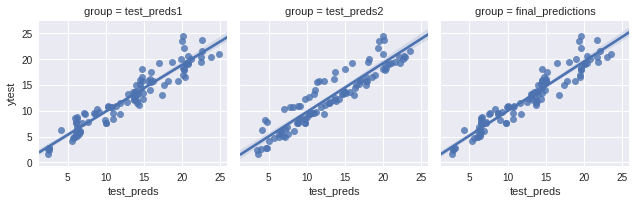

In [58]:
g = sns.FacetGrid(result, col="group", margin_titles=True)
g.map(sns.regplot, "test_preds", "ytest", fit_reg=True, x_jitter=.1);